# **Materi 15 - Statistical Test I**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

# Outline
---

1. Review materi
2. Case 1 - How to sample data
3. Case 2 - Jogging dengan Sam
4. Case 3 - Sam vs Atlet

- Kita perlu memanggil library dan fungsi yang diperlukan untuk menjalankan code dalam notebook ini.

In [1]:
# Process data
import pandas as pd
import numpy as np

# Visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Review materi
---

Dari materi yang sudah dipelajari di video:

## Population and Sample
---

<center>
<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_15_01.jpg">
</center>

**Populasi** adalah semua objek yang diteliti ($N$). Angka yang diperoleh pada populasi disebut dengan **parameter**

**Permasalahan**

Saat bekerja dengan data, kita sering tidak memiliki akses ke semua kemungkinan pengamatan. Ini bisa karena berbagai alasan, Misalnya:
- Sulit atau mahal untuk membuat lebih banyak pengamatan.
- Sulit untuk mengumpulkan semua pengamatan bersama-sama.
- Pengamatan lebih lanjut diharapkan akan dilakukan di masa depan.

Sehingga dalam prakteknya, peneliti akan menggunakan data **sampel**.
- **Sampel** merupakan bagian kecil dari populasi yang diambil sebagai objek dalam sebuah pengamatan karena dianggap mampu mewakili populasi ($n$).
- Angka yang diperoleh ketika bekerja dengan sampel disebut **statistik**.

## Hypothesis Testing
---

- Uji hipotesis (hypothesis testing) adalah **metode** pengambilan keputusan.
- Hasil dari uji hipotesis adalah "signifikansi" secara statistik jika kejadian tersebut hampir tidak mungkin terjadi karena kebetulan.
- Contoh: *Ingin membuktikan apakah mengirim email marketing akan meningkatkan penjualan / tidak*

### Istilah dalam uji hipotesis
---

Berikut adalah beberapa istilah yang ditemukan dalam uji hipotesis.

**Hipotesis**

---

- Asumsi tentang suatu hal yang belum tentu terbukti kebenarannya.
- Selama uji hipotesis, kita biasa untuk membuat 2 hipotesis.
  - $H_{0}$: Hipotesis pembanding yang ingin kita tolak, *devil's advocate*
  - $H_{1}$: Hipotesis yang ingin dibuktikan kebenarannya

- Contoh kita ingin memeriksa fitur **Coba Gratis** akan meningkatkan conversion rate (CVR) dari suatu penjualan.

- Maka hipotesis yang dibuat adalah
  - $H_{0}$: $\text{CVR}_{\text{coba gratis}}$ = $\text{CVR}_{\text{lama}}$
  - $H_{1}$: $\text{CVR}_{\text{coba gratis}}$ > $\text{CVR}_{\text{lama}}$

**Significance Level** ($\alpha$)

---

- Semakin rendah signifincance level, semakin kita percaya terhadap penelitian kita
- Jika penelitian memiliki resiko yang tinggi, bisa set significance level serendah mungkin
- Tingkat signifikansi yang umum adalah 0.05


**Statistik Uji**

---

- Metode pengujian statistik (rata-rata, proporsi, varians, dan lain-lain) dalam hipotesis.
- Ada banyak macam uji statistik bergantung kebutuhan seperti z test, t test, chi-square test, dan lain-lain.
- Statistik uji dihitung dengan menggunakan informasi dari data sampel

**Aturan membuat keputusan**

---

- Alur melakukan uji hipotesis adalah sebagai berikut:

<center>
<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_15_02.png">

Aturan keputusan didasarkan tiga hal, level signifikansi, distribusi statistik uji, dan tipe uji
- level signifikansi menentukan titik kritis, atau daerah penolakan
- distribusi statistik uji menentukan titik kritis berdasarkan distribusi uji
- tipe uji menentukan daerah penolakan di sebelah mana
  - jika pada $H_1$ ada tanda '$<$,$\leq$' maka, daerah penolakan ada di sebelah kiri
  - jika pada $H_1$ ada tanda '$>$,$\geq$' maka, daerah penolakan ada di sebelah kanan
  - jika pada $H_1$ ada tanda '$\not=$' maka, daerah penolakan ada di sebelah kanan dan kiri

Aturan keputusan bisa dilakukan dengan 2 cara:
  - Membandingkan nilai statistik uji dan nilai kritis
   - Uji Pihak Kiri, stats uji $<$ nilai kritis ; tolak $H_0$
   - Uji Pihak Kanan, stats uji $>$ nilai kritis ; tolak $H_0$
   - Uji Dua Pihak, stats uji $>$ nilai kritis atau stats uji $<$ -nilai kritis (untuk distribusi t & z saja); tolak $H_0$
  - Membandingkan p-value dan $\alpha$
   - Untuk semua uji, p-value < $\alpha$ ; tolak $H_0$

Cara menghitung p-value
  - pada Uji Pihak Kiri: <br> $\text{p}_{\text{value}}=P(T \leq t_{\text{hitung}})$

  - pada Uji Pihak Kanan: <br> $\text{p}_{\text{value}}=P(T \geq t_{\text{hitung}})$

  - pada Uji 2 Pihak: <br> $\text{p}_{\text{value}}=2 \cdot \min (P(T \leq t_{\text{hitung}}), 1-P(T \leq t_{\text{hitung}}))$

Dimana:
- `T` = variable random distribusi statistik uji
- `t_hitung` = nilai statistik uji yang didapatkan

# Case Study 1 - How to sample data
---


- Saat melakukan penelitian, kita cenderung tidak dapat untuk mengakses seluruh data yang ingin kita teliti.
- Contohnya jika kita ingin mengetahui berapa berat badan remaja di Indonesia?
- Kita tidak mungkin untuk mengukur satu-satu seluruh remaja yang ada di Indonesia.
- Untuk mengatasi itu, kita dapat melakukan penelitian terhadap sampel dari populasi.

- Mari coba lihat contoh pengambilan sample dari data berikut `california housing`

In [2]:
# Import data
filename = 'C:/Users/farha/Documents/pacmann/02_probability/dataset/week-7-8-california_housing_train.csv'
data = pd.read_csv(filename)

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Parameter populasi
---

- Anggap data ini adalah **populasi**, maka parameter rata-rata dari populasi dapat dicari menggunakan fungsi `mean()`

In [3]:
# Cari rata-rata populasi dari usia rumah (housing_median_age)
mean_pop = data['housing_median_age'].mean()

print(f'Rata-rata populasi: {mean_pop:.2f}')

Rata-rata populasi: 28.64


## Statistik sample
---

- Sekarang kita coba mencari statistik dari sample (yakni rata-rata `housing_median_age`).
- Gunakan fungsi `sample()` untuk mencarinya.

In [4]:
# Hitung rata-rata housing_median_age dari 10 sampel
n_sample = 10

mean_sample = (
    data['housing_median_age']
    .sample(n = n_sample)
    .mean()
)
print(f'Rata-rata {n_sample} sample: {mean_sample:.2f}')
print(f'Rata-rata populasi: {mean_pop:.2f}')

Rata-rata 10 sample: 31.10
Rata-rata populasi: 28.64


In [5]:
# Hitung rata-rata housing_median_age dari 100 sampel
n_sample = 100

mean_sample = (
    data['housing_median_age']
    .sample(n = n_sample)
    .mean()
)
print(f'Rata-rata {n_sample} sample: {mean_sample:.2f}')
print(f'Rata-rata populasi: {mean_pop:.2f}')

Rata-rata 100 sample: 27.42
Rata-rata populasi: 28.64


In [6]:
# Hitung rata-rata housing_median_age dari 1000 sampel
n_sample = 1_000

mean_sample = (
    data['housing_median_age']
    .sample(n = n_sample)
    .mean()
)
print(f'Rata-rata {n_sample} sample: {mean_sample:.2f}')
print(f'Rata-rata populasi: {mean_pop:.2f}')

Rata-rata 1000 sample: 28.85
Rata-rata populasi: 28.64


In [7]:
# Hitung rata-rata housing_median_age dari 10.000 sampel
n_sample = 10_000

mean_sample = (
    data['housing_median_age']
    .sample(n = n_sample)
    .mean()
)
print(f'Rata-rata {n_sample} sample: {mean_sample:.2f}')
print(f'Rata-rata populasi: {mean_pop:.2f}')

Rata-rata 10000 sample: 28.72
Rata-rata populasi: 28.64


## Error dalam melakukan sampling
---

- Dalam setiap pengambilan sampel, kemungkinan besar peneliti akan menimbulkan error.
- Error/kesalahan pengambilan sampel adalah penyimpangan dalam nilai sampel versus nilai populasi sebenarnya.
- Kesalahan pengambilan sampel terjadi karena sampel tidak mewakili populasi atau bias dalam beberapa hal.
- Bahkan sampel yang diacak pun akan memiliki beberapa tingkat kesalahan pengambilan sampel karena sampel hanya merupakan perkiraan populasi dari mana sampel itu diambil.
- Dalam kenyataannya, kita sering kali tidak mengetahui nilai dari populasi sehingga kita tidak dapat menghitung error yang akan terjadi secara persis. (pada contoh soal berikut kita dianggap mengetahui parameter populasi)

### Simulasi error

- Error dapat kita dekati sebagai selisih antara parameter populasi dengan statistik sample.

$$
\text{error} = \mu - \bar{x}
$$

- Dengan
  - $\mu$: rata-rata populasi
  - $\bar{x}$: rata-rata sample

In [8]:
# JALANKAN FUNGSI INI
def simulasi_error(data):
    """
    Simulasi error dari pengambilan sample pada data.
    Sample diambil dari ukuran 1 hingga n secara random dengan n adalah banyak data.
    """
    # Cari parameter data
    n_data = len(data)
    mean_pop = data['housing_median_age'].mean()

    # Mulai simulasi
    list_error = []
    for i, n_sample in enumerate(range(1, n_data+1)):
        # Cari statistik sample
        mean_sample = (
            data['housing_median_age']
            .sample(n=n_sample, random_state=i)
            .mean()
        )

        # Cari relative error
        error = mean_pop - mean_sample
        rel_error = 100 * abs(error) / mean_pop
        list_error.append(rel_error)

    return pd.DataFrame(
        {'n_sample': range(1, n_data+1),
         'relative_error': list_error}
    )


In [9]:
# Lakukan simulasi
df_error = simulasi_error(data=data)
df_error

,n_sample,relative_error
0,1,23.182980
1,2,32.683944
2,3,27.838557
3,4,32.785108
4,5,29.192261
...,...,...
20635,20636,0.003309
20636,20637,0.003878
20637,20638,0.001475
20638,20639,0.002260


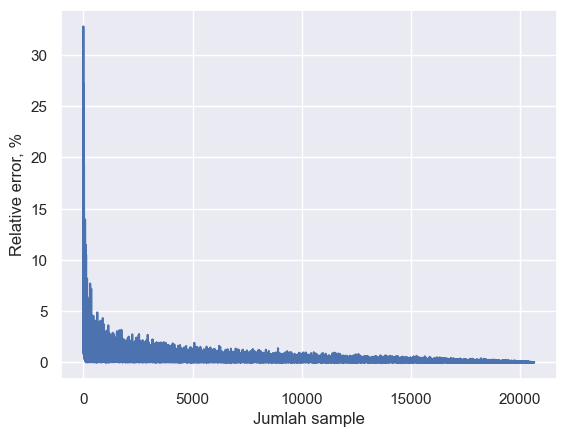

In [10]:
# Visualkan
plt.plot(df_error['n_sample'], df_error['relative_error'])

plt.xlabel('Jumlah sample')
plt.ylabel('Relative error, %')
plt.show()

### Kesimpulan
---

- Saat kita mengambil sampel dengan jumlah yang sedikit, error yang dihasilkan akan cukup tinggi.
- Relative error akan berkurang bahkan mendekati 0 ketika sample size = jumlah populasi
-Jika sampel Anda **terlalu kecil**, Anda dapat memasukkan jumlah individu yang tidak proporsional yang merupakan outlier dan anomali. Ini mencondongkan hasil dan Anda tidak mendapatkan gambaran yang adil dari seluruh populasi.
-Jika sampelnya terlalu besar, keseluruhan penelitian menjadi rumit, mahal, dan memakan waktu untuk dijalankan, dan meskipun hasilnya lebih akurat, manfaatnya tidak lebih besar daripada biayanya.

# Case Study 2 - Jogging with Sam
---

- Hari ini kamu janji ingin nge-gym bareng temen kamu bernama Sam.
- Di perjalanan menuju gym, Sam mengatakan bahwa kecepatan dia dalam berlari adalah 8 km/jam.
- Untuk mengetahui apakah Sam berbohong atau tidak, kamu memantau kecepatan berlari Sam selama 10 hari berturut-turut.


### Hipotesis
---

- Sam mengatakan bahwa kecepatan larinya adalah 8 km/jam
- Dalam 10 kali gym bareng Sam, kamu mendapatkan data rata-rata larinya sebagai berikut <br>`x = [7.0, 7.5, 6.0, 7.7, 5.9, 8.0, 7.0, 7.8, 5.8, 6.6]`
- Hipotesis kamu, Sam berlari lebih lambat dari yang dia bilang.

In [11]:
# Jalankan untuk mendapatkan data x
x = [7.0, 7.5, 6.0, 7.7, 5.9, 8.0, 7.0, 7.8, 5.8, 6.6]

Maka hipotesis yang ingin kita uji adalah
- $H_{0}$: $\bar{x} = 8 \text{ km/jam}$
- $H_{1}$: $\bar{x} < 8 \text{ km/jam}$

### Statistik uji yang akan digunakan
---

- Yang kita ingin uji adalah **rata-rata**, maka z-test atau t-test
- Sample yang kita punya kecil, maka pilih t-test.

$$
T = \frac{\bar{x}-\mu_0}{\sqrt{s^2/n}} \sim t_{n-1}.
$$

- Mari kita lakukan pengujian

In [12]:
# Definisikan variable
x_bar = np.mean(x)              # rata-rata sample
mu_0 = 8.0                      # rata-rata populasi (dari Sam)
s_square = np.var(x, ddof=1)    # varians sample
n = len(x)                      # banyak data sample

print(f'Rata-rata sample   : {x_bar:.2f}')
print(f'Rata-rata populasi : {mu_0:.2f}')
print(f'Varians sample     : {s_square:.2f}')
print(f'Banyak sample      : {n}')

Rata-rata sample   : 6.93
Rata-rata populasi : 8.00
Varians sample     : 0.68
Banyak sample      : 10


In [13]:
# Hitung t-test
t_score = (x_bar-mu_0) / np.sqrt(s_square/n)
print(f'T_score : {t_score:.4f}')

T_score : -4.0962


- Nilai negatif karena $\bar{x}$ lebih kecil dibanding $\mu_{0}$
- Dalam visualisasi

In [14]:
from scipy.stats import t

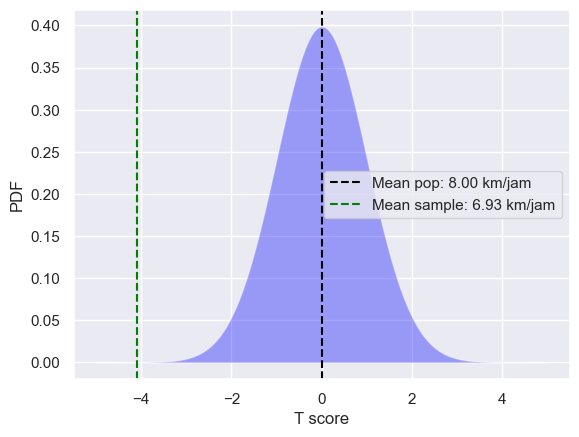

In [15]:
# Visualisasi distribusi t-score
x_ = np.arange(-5, 5, 0.01)
pdf_ = t.pdf(x_, df=len(x_))

plt.fill_between(x_, pdf_, facecolor='blue', alpha=0.35)

plt.axvline(0.0, linestyle='--', color='black', label=f'Mean pop: {mu_0:.2f} km/jam')
plt.axvline(t_score, linestyle='--', color='green', label=f'Mean sample: {x_bar:.2f} km/jam')

plt.xlabel('T score')
plt.ylabel('PDF')
plt.legend()
plt.show()

### Membuat keputusan
---

- Definisikan significance level, misal $\alpha = 0.05$ atau confidence level 95%

In [16]:
alpha = 0.05

#### Cara 1: Gunakan `t_critical`
---

- Informasi $\alpha$ harus dikonversi dalam sudut pandang T-score agar bisa menjadi threshold penentu signifikansi uji.
- **Ingat**, $\alpha$ serupa dengan confidence level (CDF) dari distribusi T-score.
- Maka, $\alpha = 0.05$ atau confidence level 95% adalah `t_score` yang menyebabkan CDF = 0.95.

In [17]:
# Hitung ppf
t_critical = t.ppf(alpha, df=n-1)

print(f'Saat alpha={alpha}, t_critical={t_critical:.4f}')

Saat alpha=0.05, t_critical=-1.8331


- `t_critical` negative karena $\bar{x} < \mu_{0}$
- Coba visualkan $\alpha$ atau `t_critical`

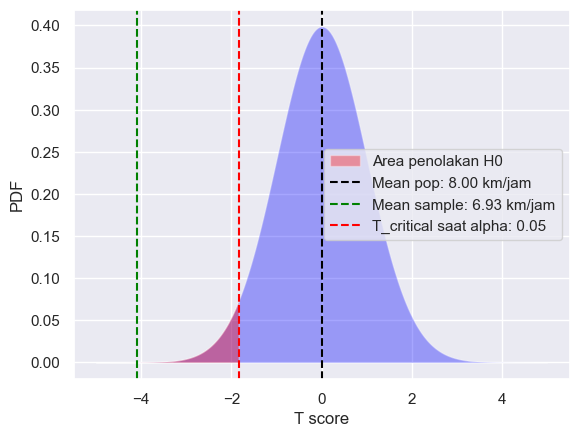

In [18]:
plt.fill_between(x_, pdf_, facecolor='blue', alpha=0.35)

plt.fill_between(np.arange(-5.0, t_critical, 0.01),
                 t.pdf(np.arange(-5.0, t_critical, 0.01), df=len(x_)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area penolakan H0')

plt.axvline(0.0, linestyle='--', color='black', label=f'Mean pop: {mu_0:.2f} km/jam')
plt.axvline(t_score, linestyle='--', color='green', label=f'Mean sample: {x_bar:.2f} km/jam')
plt.axvline(t_critical, linestyle='--', color='red', label=f'T_critical saat alpha: {alpha}')

plt.xlabel('T score')
plt.ylabel('PDF')
plt.legend()
plt.show()

- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } t_{\text{test}} < t_{\text{crit}} \\
 & \text{H0 gagal ditolak,} \text{ jika } t_{\text{test}} \geq t_{\text{crit}}
\end{cases}
$$

In [19]:
print('Pengambilan Keputusan:')
if t_score < t_critical:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


#### Cara 2: Gunakan $\alpha$
---

- $\alpha$ analog dengan CDF dari distribusi t.
- Maka kita bisa konversi `t_score` ke dalam CDF
- Ini bisa didapat menggunakan fungsi `t.cdf()`
- Hasil konversi ini disebut dengan **p_value**

In [20]:
# Hitung p_value dari t_score
p_value = t.cdf(t_score, df=n-1)

print(f'p_value : {p_value:.4f}')

p_value : 0.0013


- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } \text{p_value} < \alpha \\
 & \text{H0 gagal ditolak,} \text{ jika } \text{p_value} \geq \alpha
\end{cases}
$$

In [21]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


### Gunakan Library untuk uji hipotesis
---

Cara menggunakan perhitungan uji statistik t untuk uji rata rata 1 sampel menggunakan scipy.stats

- Import library yang dibutuhkan `from scipy.stats import ttest_1samp`
- Gunakan fungsi `ttest_1samp(a = ... , popmean = ... , alternative = ... )`

Dengan memasukkan parameter:
- `a` : data sampel yang diuji
- `popmean` : rata rata populasi yang diklaim di $H_0$
- `alternative` : uji pihak yang dilakukan, cek $H_1$
  - jika pada $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
  - jika pada $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'greater' : uji pihak kanan
  - jika pada $H_1$ ada tanda '$\not=$' maka gunakan 'two-side' : uji dua pihak

- Fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [22]:
# Import library
from scipy.stats import ttest_1samp

In [23]:
# Hitung uji statistik
t_score, p_value = ttest_1samp(
    a = x,                  # Data dari sample
    popmean = 8.0,          # Rata-rata populasi
    alternative = 'less'    # Uji kiri, karena H1: sample < pop
)

print(f'T score : {t_score:.4f}')
print(f'P value : {p_value:.4f}')

T score : -4.0962
P value : 0.0013


Pengambilan keputusan

In [24]:
print('Pengambilan Keputusan:')
if t_score < t_critical:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


In [25]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


# Case Study 3 - Sam vs Atlet
---

- Sam mengatakan bahwa rata-rata lari dia **lebih cepat** dari pada rata-rata lari atlet.
- Apakah pernyataan Sam tersebut benar?

### Hipotesis
---

- Kamu memantau 10x percobaa lari dari Sam dan atlet. Berikut data yang didapat

In [26]:
# Data observasi
sam = [7.0, 7.5, 6.0, 7.7, 5.9, 8.0, 7.0, 7.8, 5.8, 6.6]
atlet = [9.0, 7.5, 10.0, 8.0, 8.9, 8.0, 11.0, 8.8, 9.8, 7.6]

- Karena kita kasihan dengan Sam, kita akan menguji apakah rata-rata kecepatan lari Sam dan atlet berebda.
- Maka hipotesi yang diuji adalah
  - $H_{0}$ : $\mu_{\text{sam}} = \mu_{\text{atlet}}$
  - $H_{1}$ : $\mu_{\text{sam}} \neq \mu_{\text{atlet}}$

### Statistik uji yang digunakan
---

- Apa yang kita bandingkan? **Rata-rata**, maka bisa gunakan *z-test* atau *t-test*
- Apa kita tau informasi populasi? **Tidak**, maka gunakan *t-test*
- Apakah varians antar sample sama? **Tidak**, maka gunakan *t-test* dengan beda varians.

- Maka formula t-test yang digunakan adalah sebagai berikut

$$
t =
\cfrac
{\bar{x}_{1} - \bar{x}_{2}}
{
    \sqrt{
        \cfrac{s_{1}^{2}}{n_{1}}
        +
        \cfrac{s_{2}^{2}}{n_{2}}
    }
}
$$

- Mari kita lakukan pengujian

In [27]:
# Cari statistik sam
x1_bar = np.mean(sam)
s1_square = np.var(sam, ddof=1)
n1 = len(sam)

# Cari statistik atlet
x2_bar = np.mean(atlet)
s2_square = np.var(atlet, ddof=1)
n2 = len(atlet)

print('Rata-rata')
print(f' - Sam   : {x1_bar:.2f}')
print(f' - Atlet : {x2_bar:.2f}')
print('Varians')
print(f' - Sam   : {s1_square:.2f}')
print(f' - Atlet : {s2_square:.2f}')
print('Banyak sample')
print(f' - Sam   : {n1:.0f}')
print(f' - Atlet : {n2:.0f}')

Rata-rata
 - Sam   : 6.93
 - Atlet : 8.86
Varians
 - Sam   : 0.68
 - Atlet : 1.30
Banyak sample
 - Sam   : 10
 - Atlet : 10


- Maka formula t-test yang digunakan adalah sebagai berikut

$$
t =
\cfrac
{\bar{x}_{1} - \bar{x}_{2}}
{
    \sqrt{
        \cfrac{s_{1}^{2}}{n_{1}}
        +
        \cfrac{s_{2}^{2}}{n_{2}}
    }
}
$$

In [28]:
# Hitung t-test
t_score = (x1_bar-x2_bar) / np.sqrt((s1_square/n1) + (s2_square/n2))
print(f'T_score : {t_score:.4f}')

T_score : -4.3343


- Nilai negatif karena $\bar{x}_{1}$ lebih kecil dibanding $\bar{x}_{2}$ (referensi)
- Dalam visualisasi

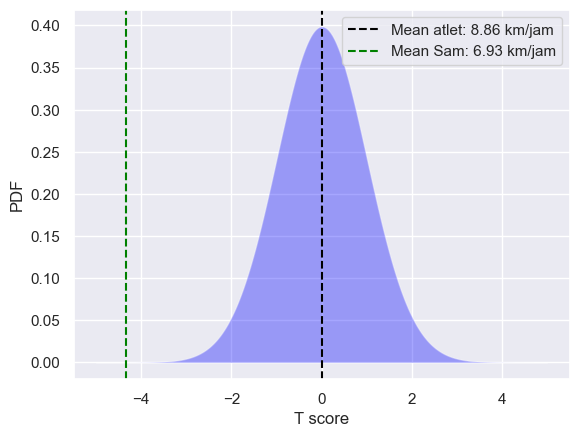

In [29]:
# Visualisasi distribusi t-score
x_ = np.arange(-5, 5, 0.01)
pdf_ = t.pdf(x_, df=len(x_))

plt.fill_between(x_, pdf_, facecolor='blue', alpha=0.35)

plt.axvline(0.0, linestyle='--', color='black', label=f'Mean atlet: {x2_bar:.2f} km/jam')
plt.axvline(t_score, linestyle='--', color='green', label=f'Mean Sam: {x1_bar:.2f} km/jam')

plt.xlabel('T score')
plt.ylabel('PDF')
plt.legend()
plt.show()

### Membuat keputusan
---

- Definisikan significance level, misal $\alpha = 0.05$ atau confidence level 95%

In [30]:
alpha = 0.05

#### Cara 1: Gunakan `t_critical`
---

- Informasi $\alpha$ harus dikonversi dalam sudut pandang T-score agar bisa menjadi threshold penentu signifikansi uji.
- **Ingat**, $\alpha$ serupa dengan confidence level (CDF) dari distribusi T-score.
- Maka, $\alpha = 0.05$ atau confidence level 95% adalah `t_score` yang menyebabkan CDF = 0.95.

In [31]:
# Hitung ppf
# Akan ada 2 t_critical karena H1 bernilai !=,
# maka alpha dibagi 2 agar CDF tetap 95%
t_critical_lower = t.ppf(alpha/2., df=n-1)
t_critical_upper = t.ppf(1 - (alpha/2.), df=n-1)

print(f'Saat alpha = {alpha}')
print(f' - t_critical_lower = {t_critical_lower:.4f}')
print(f' - t_critical_upper = {t_critical_upper:.4f}')

Saat alpha = 0.05
 - t_critical_lower = -2.2622
 - t_critical_upper = 2.2622


- Coba visualkan $\alpha$ atau `t_critical`

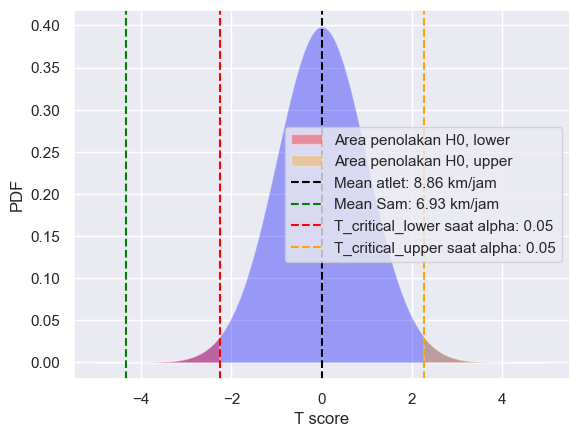

In [32]:
plt.fill_between(x_, pdf_, facecolor='blue', alpha=0.35)

plt.fill_between(np.arange(-5.0, t_critical_lower, 0.01),
                 t.pdf(np.arange(-5.0, t_critical_lower, 0.01), df=len(x_)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area penolakan H0, lower')

plt.fill_between(np.arange(t_critical_upper, 5.0, 0.01),
                 t.pdf(np.arange(t_critical_upper, 5.0, 0.01), df=len(x_)),
                 facecolor='orange',
                 alpha=0.35,
                 label='Area penolakan H0, upper')

plt.axvline(0.0, linestyle='--', color='black', label=f'Mean atlet: {x2_bar:.2f} km/jam')
plt.axvline(t_score, linestyle='--', color='green', label=f'Mean Sam: {x1_bar:.2f} km/jam')
plt.axvline(t_critical_lower, linestyle='--', color='red', label=f'T_critical_lower saat alpha: {alpha}')
plt.axvline(t_critical_upper, linestyle='--', color='orange', label=f'T_critical_upper saat alpha: {alpha}')

plt.xlabel('T score')
plt.ylabel('PDF')
plt.legend()
plt.show()

- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } t_{\text{test}} < t_{\text{crit lower}} \\
  & \text{H0 ditolak,} \text{ jika } t_{\text{test}} > t_{\text{crit upper}} \\
 & \text{H0 gagal ditolak,} \text{ jika } t_{\text{crit lower}} \leq t_{\text{test}} \leq t_{\text{crit upper}}
\end{cases}
$$

In [33]:
print('Pengambilan Keputusan:')
if t_score < t_critical_lower:
    print('Tolak H0')
elif t_score > t_critical_upper:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


#### Cara 2: Gunakan $\alpha$
---

- $\alpha$ analog dengan CDF dari distribusi t.
- Maka kita bisa konversi `t_score` ke dalam CDF
- Ini bisa didapat menggunakan fungsi `t.cdf()`
- Hasil konversi ini disebut dengan **p_value**

In [34]:
# Hitung p_value dari t_score
p_value = t.cdf(t_score, df=n-1)/2.

print(f'p_value : {p_value:.4f}')

p_value : 0.0005


- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } \text{p_value} < \alpha \\
 & \text{H0 gagal ditolak,} \text{ jika } \text{p_value} \geq \alpha
\end{cases}
$$

In [35]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


### Gunakan Library untuk uji hipotesis
---

Cara menggunakan perhitungan uji statistik t untuk uji rata rata 2 sampel menggunakan scipy.stats

- Import library yang dibutuhkan `from scipy.stats import ttest_ind`
- Gunakan fungsi `ttest_ind(a = ... , b = ... , equal_var = ... , alternative = ... )`

Dengan memasukkan parameter:
- `a` : data sampel yang diuji (data1)
- `b` : data sampel yang diuji (data2)
- `equal_var` : kondisi apakah kedua sampel punya varians yang sama atau tidak isi dengan `True` atau `False`
- `alternative` : uji pihak yang dilakukan, cek $H_1$
    - jika pada $H_1$ ada tanda '$<$,$\leq$' maka gunakan 'less' untuk uji pihak kiri
    - jika pada $H_1$ ada tanda '$>$,$\geq$' maka gunakan 'greater' : uji pihak kanan
    - jika pada $H_1$ ada tanda '$\not=$' maka gunakan 'greater' : uji pihak kanan
        
- fungsi tersebut akan mengeluarkan 2 output yaitu nilai statistik uji, dan p-value

In [36]:
# Import library
from scipy.stats import ttest_ind

In [37]:
# Lakukan testing
t_score, p_value = ttest_ind(
    a = sam,
    b = atlet,
    equal_var = False,
    alternative = 'two-sided'
)

print(f'T score : {t_score:.4f}')
print(f'P value : {p_value:.4f}')

T score : -4.3343
P value : 0.0005


- Pengambilan Keputusan

In [38]:
print('Pengambilan Keputusan:')
if t_score < t_critical_lower:
    print('Tolak H0')
elif t_score > t_critical_upper:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


In [39]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


### Latihan!
---

Lakukan uji hipotesis untuk memeriksa apakah Sam berlari lebih lambat dibanding Atlet!